In [2]:
# Librerias necesarias
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns


# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [3]:
df = pd.read_csv('../Dataset/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [5]:
def unique_values_object_columns(df):
    return df.select_dtypes(include='object').nunique()
unique_values_object_columns(df)

General_Health      5
Checkup             5
Exercise            2
Heart_Disease       2
Skin_Cancer         2
Other_Cancer        2
Depression          2
Diabetes            4
Arthritis           2
Sex                 2
Age_Category       13
Smoking_History     2
dtype: int64

In [6]:
df.Age_Category.unique()

array(['70-74', '60-64', '75-79', '80+', '65-69', '50-54', '45-49',
       '18-24', '30-34', '55-59', '35-39', '40-44', '25-29'], dtype=object)

In [7]:
df.replace({'18-24': 0, '25-29': 1, '30-34': 2, '35-39': 3, '40-44': 4, '45-49': 5,
    '50-54': 6, '55-59': 7, '60-64': 8, '65-69': 9, '70-74': 10, '75-79': 11, '80+': 12
}, inplace=True)


In [8]:
df.General_Health.unique()

array(['Poor', 'Very Good', 'Good', 'Fair', 'Excellent'], dtype=object)

In [9]:
df['General_Health'].replace({'Poor': 0, 'Good': 1, 'Fair': 2, 'Very Good': 3, 'Excellent':4}, inplace=True)


In [10]:
df.Diabetes.unique()

array(['No', 'Yes', 'No, pre-diabetes or borderline diabetes',
       'Yes, but female told only during pregnancy'], dtype=object)

In [11]:
df.Diabetes.replace({'No': 0, 'Yes': 1, 'No, pre-diabetes or borderline diabetes': 2,'Yes, but female told only during pregnancy': 3}, inplace=True)

In [12]:
df.Diabetes.unique()

array([0, 1, 2, 3], dtype=int64)

In [13]:
df.Checkup.unique()

array(['Within the past 2 years', 'Within the past year',
       '5 or more years ago', 'Within the past 5 years', 'Never'],
      dtype=object)

In [14]:
df['Checkup'].replace({'Never': 0, 'Within the past year': 1, 'Within the past 2 years': 2, 
                    'Within the past 5 years': 3, '5 or more years ago': 4}, inplace=True)

In [15]:
two_cat_vals = ['Exercise','Heart_Disease', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']


for col in df[two_cat_vals]:
    df[col].replace({'Yes': 1, 'No': 0}, inplace=True)

df['Sex'].replace({ 'Male': 1, 'Female': 0}, inplace=True)
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,0,2,0,0,0,0,0,0,1,0,10,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,3,1,0,1,0,0,0,1,0,0,10,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,3,1,1,0,0,0,0,1,0,0,8,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,0,1,1,1,0,0,0,1,0,1,11,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,1,1,0,0,0,0,0,0,0,1,12,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


In [16]:
df.columns

Index(['General_Health', 'Checkup', 'Exercise', 'Heart_Disease', 'Skin_Cancer',
       'Other_Cancer', 'Depression', 'Diabetes', 'Arthritis', 'Sex',
       'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', 'Smoking_History',
       'Alcohol_Consumption', 'Fruit_Consumption',
       'Green_Vegetables_Consumption', 'FriedPotato_Consumption'],
      dtype='object')

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  int64  
 1   Checkup                       308854 non-null  int64  
 2   Exercise                      308854 non-null  int64  
 3   Heart_Disease                 308854 non-null  int64  
 4   Skin_Cancer                   308854 non-null  int64  
 5   Other_Cancer                  308854 non-null  int64  
 6   Depression                    308854 non-null  int64  
 7   Diabetes                      308854 non-null  int64  
 8   Arthritis                     308854 non-null  int64  
 9   Sex                           308854 non-null  int64  
 10  Age_Category                  308854 non-null  int64  
 11  Height_(cm)                   308854 non-null  float64
 12  Weight_(kg)                   308854 non-nul

In [18]:
df.Smoking_History

0         1
1         0
2         0
3         0
4         1
         ..
308849    0
308850    0
308851    1
308852    0
308853    0
Name: Smoking_History, Length: 308854, dtype: int64

In [19]:
def view_correlation(df, column):
    for col in df.columns:
        if df[col].dtype != 'object':
            print(f'{col}: {df[column].corr(df[col]):.4f}')


view_correlation(df, 'Heart_Disease')



General_Health: -0.1715
Checkup: -0.0849
Exercise: -0.0963
Heart_Disease: 1.0000
Skin_Cancer: 0.0908
Other_Cancer: 0.0924
Depression: 0.0325
Diabetes: 0.1231
Arthritis: 0.1539
Sex: 0.0726
Age_Category: 0.2290
Height_(cm): 0.0158
Weight_(kg): 0.0459
BMI: 0.0427
Smoking_History: 0.1078
Alcohol_Consumption: -0.0366
Fruit_Consumption: -0.0201
Green_Vegetables_Consumption: -0.0240
FriedPotato_Consumption: -0.0092


# Mostrar correlación entre variables

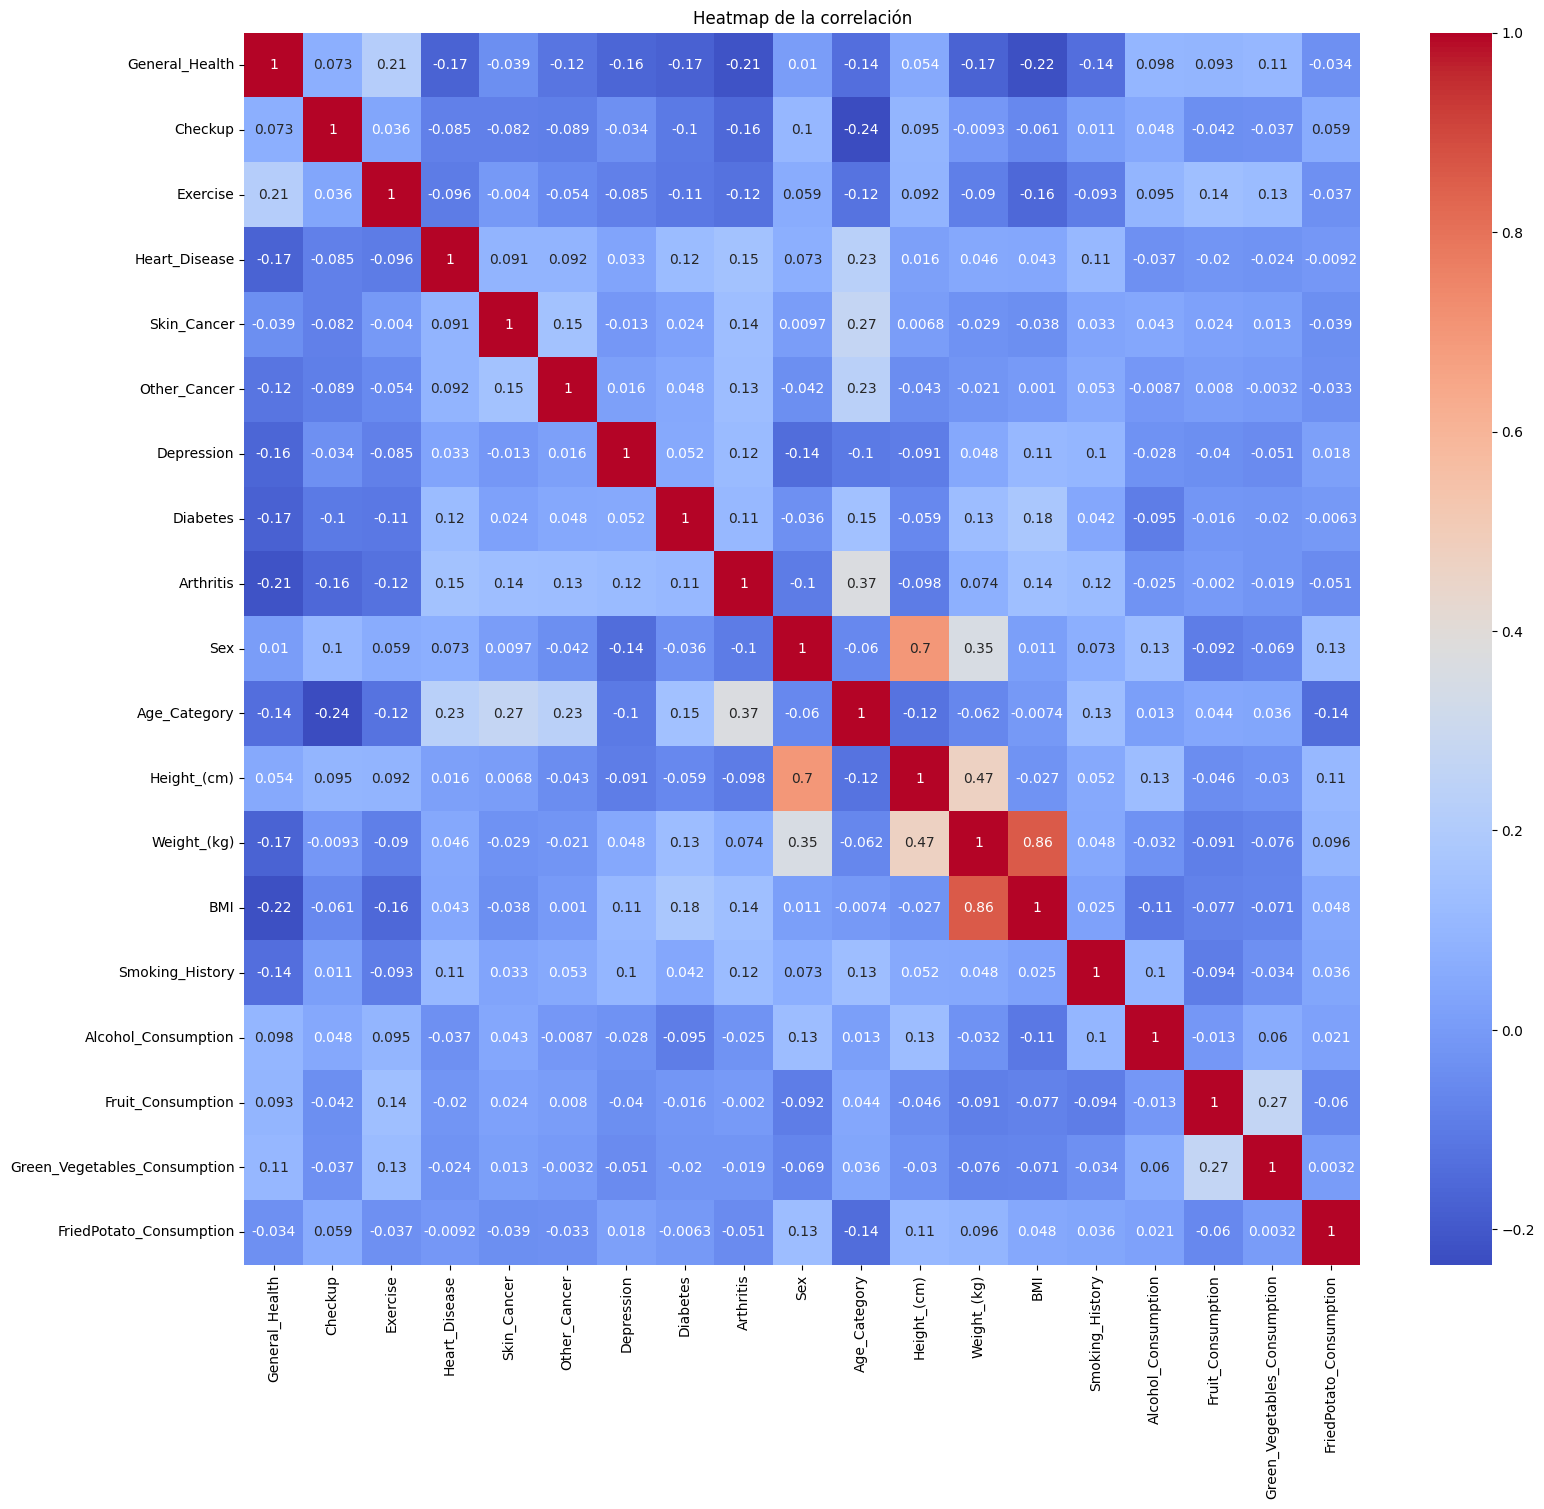

In [20]:
plt.figure(figsize=(18, 16))
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.title('Heatmap de la correlación')
plt.show()

# Dividir el conjunto de datos

In [21]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import VotingRegressor


X = df.drop(columns='Heart_Disease')
y = df['Heart_Disease'].copy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creación de modelos de clasificación

# Logistic Regression

In [29]:

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_lr)) # 1
print("MSE", mean_squared_error(y_test, y_pred_lr)) # 0

Accuracy 0.9185540140195237
MSE 0.08144598598047628


## Decision Tree Classifier

In [25]:
dtc = DecisionTreeClassifier()  
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred_dtc)) # 1
print("MSE", mean_squared_error(y_test, y_pred_dtc)) # 0

Accuracy 0.8629292062618381
MSE 0.13707079373816192


# Union de modelos

In [28]:
from sklearn.ensemble import VotingClassifier


# Create the voting classifier
voting_clf = VotingClassifier(estimators=[('lr', lr), ('DecicionTreeClassifier', dtc)], voting='hard')

# Fit the voting classifier to the training data
voting_clf.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = voting_clf.predict(X_test)

print("Accuracy", accuracy_score(y_test, y_pred)) # 1
print("MSE", mean_squared_error(y_test, y_pred)) # 0

Accuracy 0.9191044341195707
MSE 0.08089556588042933
